# Double pendulum problem

A double pendulum is described in the configuration space by the equations:


In [85]:
from scipy.integrate import solve_ivp
import pandas as pd
import numpy as np
#Libraries for the rendering
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, clear_output, HTML

## Utilities

In [86]:
# Map to convert any angle to the range 0-2pi
def map_to_2pi(alpha):
  k = np.floor(alpha/(2*np.pi)) #Number of complete rotations
  alpha = alpha-k*2*np.pi
  return alpha

# Plot the pendulum
def plot_trajectory(data_frames, t_span=None, color='g'):
  fig, ax = plt.subplots()
  max = []
  for df in data_frames:
    max.append(1.1*np.abs(df['x']).max())
    fig.suptitle('Double pendulum')
   # df doesn't work because it's initialized inside an array, so the final result is not saved  
    if t_span != None:
      df = df[df['t'] >= t_span[0]]
      df = df[df['t'] <= t_span[1]]
      
  max = np.array(max).max() 
  t = df.iloc[-1]['t']
  ax.set_xlim(-max, max)
  ax.set_ylim(-max, max)
  ax.set_aspect('equal')
  ax.grid()
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  
  
  ax.text(0.05,0.9, f't = {t:.2f}', transform = ax.transAxes)
  
  for df in data_frames:
    ax.plot(df['x'], df['y'])
    ax.plot([0, df.iloc[-1][ 'x']], [0, df.iloc[-1][ 'y']], 'r-o')
  plt.show()

## Lagrangian of the pendulum

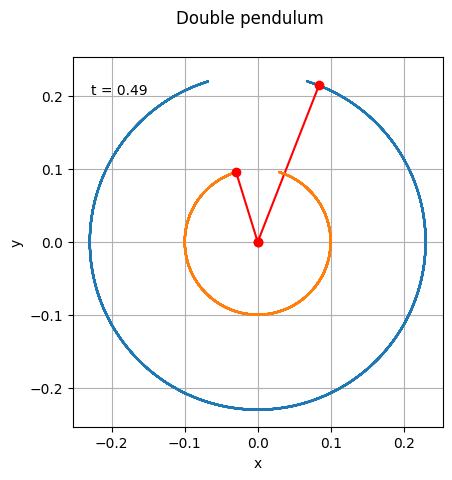

,t,theta,v_theta,K,U,E,x,y
0,0.00000,0.300000,0.000000,0.000000,2.155526,2.155526,0.067970,0.219727
1,0.01001,0.300632,0.126258,0.000422,2.155104,2.155526,0.068108,0.219684
2,0.02002,0.302529,0.253031,0.001693,2.153832,2.155526,0.068525,0.219555
3,0.03003,0.305701,0.380837,0.003836,2.151690,2.155526,0.069221,0.219336


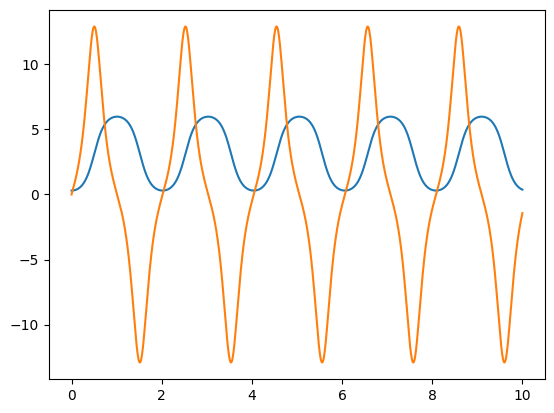

In [93]:
# dy/dt = f(t,y), with y = (theta, dtheta/dt)

def f(t, y, g, r):
  return(y[1], g/r*np.sin(y[0]))

g = 9.81
r = 0.5
m = 0.1

def pendulum_df(y0, t_span, m, g, r):  
  
  Y = solve_ivp(f, t_span=t_span, y0=y0 , method='RK45', args=(g,r), t_eval=np.linspace(0,10,1000), rtol=1e-6)
  pendulum_df = pd.DataFrame({'t':Y.t, 'theta': map_to_2pi(Y.y[0]), 'v_theta': Y.y[1]})
  pendulum_df['K'] = 0.5*m*(r*pendulum_df['v_theta'])**2
  pendulum_df['U'] = g*m*r*np.cos(pendulum_df['theta'])
  pendulum_df['E'] = pendulum_df['K']+ pendulum_df['U']

  pendulum_df['x'] = r*np.sin(pendulum_df['theta'])
  pendulum_df['y'] = r*np.cos(pendulum_df['theta'])
  return pendulum_df

a = pendulum_df(y0=(0.3,0.0), t_span=(0,10), m=1, g=9.81, r=0.23)
b = pendulum_df(y0=(0.3,0.0), t_span=(0,10), m=1, g=9.81, r=0.1)

plot_trajectory((a,b), t_span=(0,0.5))
plt.plot(a['t'], a['theta'])
plt.plot(a['t'], a['v_theta'])
a.head(4)

In [90]:
def animate(i, dt_per_frame):
  t = i*dt_per_frame
  plot_trajectory((a, b), t_span=(t-2,t))

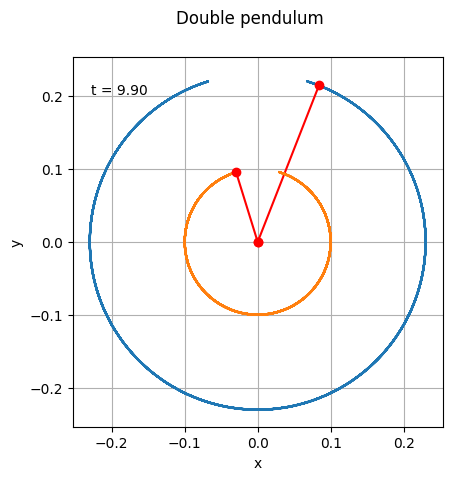

In [91]:
n_frames = 100

for i in range(n_frames):
    clear_output(wait=True)
    animate(i, 0.1)    
    